# Did National Happiness Levels Impact COVID-19 Mortality Rates?

In [1]:
# Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# File Handling

In this section, two CSV files from the 2021 World Happiness Report - one containing happiness and quality of life data by country, and the other containing COVID-19 mortality data by country - are merged to facilitate data exploration and analysis. To measure happiness levels going into the pandemic (pre-pandemic), 2019 happiness and quality of life variables are used.

In [2]:
# Load csv panel data file
file_path_panel = os.path.join("..", "Resources", "DataPanel.csv")

# Read panel csv and store as pandas df
panel_df = pd.read_csv(file_path_panel)

# Preview panel df
panel_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
# Load csv mortality data file
file_path_mort = os.path.join("..", "Resources", "MortalityData.csv")

# Read panel csv and store as pandas df
mort_df = pd.read_csv(file_path_mort)

# Preview panel df
mort_df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create filtered df from panel_df to pull 2019 records (pre-pandemic)
panel_2019_df = panel_df.loc[panel_df.year == 2019, :]

# Add 2019 prefix to column names to better identify after merge
panel_2019_df = panel_2019_df.add_prefix('2019 ')

# Remove 2019 prefix from country name column for merge
panel_2019_df = panel_2019_df.rename(columns={'2019 Country name': 'Country name'})

# View filtered df
panel_2019_df

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,2019 Negative affect
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
65,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430
...,...,...,...,...,...,...,...,...,...,...,...
1892,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,0.351
1907,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186
1919,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,0.213
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394


In [5]:
# Merge panel df with mortality df
merge_df = pd.merge(panel_2019_df, mort_df, how='left', on='Country name')

# Preview merged df
merge_df

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,...,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,...,8.623,0.0,0.0,0.046,31.000,NaN,NaN,NaN,NaN,NaN
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,...,9.036,0.0,0.0,0.150,28.960,NaN,NaN,NaN,NaN,NaN
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,...,9.159,0.0,0.0,0.415,27.620,NaN,NaN,NaN,NaN,NaN
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,...,9.717,0.0,0.0,0.091,39.600,NaN,NaN,NaN,NaN,NaN
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,...,8.858,0.0,0.0,0.174,33.620,27367.0,25645.0,26252.0,35371.0,302.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,...,9.564,0.0,0.0,0.120,37.800,NaN,NaN,NaN,NaN,NaN
140,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,...,8.108,1.0,0.0,0.490,40.100,NaN,NaN,NaN,NaN,NaN
141,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,...,8.966,0.0,0.0,0.267,36.710,NaN,NaN,NaN,NaN,NaN
142,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,...,9.251,0.0,0.0,0.322,57.140,NaN,NaN,NaN,NaN,NaN


In [6]:
# Export merged df for easier viewing
# Create export file path for merged df
output_merge_file_path = os.path.join("..", "Resources", "MergeData.csv")

# Export csv file
merge_df.to_csv(output_merge_file_path, index=False)

In [7]:
# Consolidate merged df to only include relevant columns
df = merge_df.iloc[:, np.r_[0:11, 13:15, 20:22, 26]]

# Preview df
df

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,2019 Negative affect,"COVID-19 deaths per 100,000 population in 2020",Median age,Index of institutional trust,Gini coefficient of income,"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502,5.628,18.6,0.046,31.000,NaN
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274,41.038,38.0,0.150,28.960,NaN
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215,6.285,29.1,0.415,27.620,NaN
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319,95.684,31.9,0.091,39.600,NaN
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430,95.268,35.7,0.174,33.620,302.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,0.351,3.615,29.0,0.120,37.800,NaN
140,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186,0.036,32.6,0.490,40.100,NaN
141,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,0.213,2.045,20.3,0.267,36.710,NaN
142,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394,2.110,17.7,0.322,57.140,NaN


In [8]:
# Export final df
# Create export file path for df
output_df_file_path = os.path.join("..", "Resources", "AnalysisData.csv")

# Export csv file
df.to_csv(output_df_file_path, index=False)

## Data Exploration

During data exploration, we focus on exploring the differences between the two COVID-19 death data points - COVID-19 deaths per 100k population in 2020 and Excess deaths per 100k population in 2020 - to better understand the characteristics and limitations of each. The first metric includes only those deaths determined to be due to COVID-19, while the second metric includes all excess deaths in 2020 compared to 2017-2019 averages. Thus, the second metric potentially includes other deaths caused by factors like diminished health system capacity during the pandemic for treating other illnesses. Either metric is theoretically of interest given our research question.

### Investigating Potential Outlier Effects

In this section, the two COVID-19 death data points are explored for potential outliers that could impact the analysis using standard rules for identifying potential outliers. Only one outlier is found for the COVID-19 deaths per 100k population in 2020 data point: Belgium. The exclusion of Belgium does not appear to affect the correlation coefficients of interest.

In [9]:
# Identify outlier ranges
# Pull death data columns into series
death_rate = df["COVID-19 deaths per 100,000 population in 2020"]
excess_deaths = df["Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"]

# Calculate IQR for death rate
quartiles_death_rate = death_rate.quantile([.25,.5,.75])
lowerq_rate = quartiles_death_rate[0.25]
upperq_rate = quartiles_death_rate[0.75]
iqr_rate = upperq_rate-lowerq_rate

# Calculate IQR for excess deaths
quartiles_excess_deaths = excess_deaths.quantile([.25,.5,.75])
lowerq_excess = quartiles_excess_deaths[0.25]
upperq_excess = quartiles_excess_deaths[0.75]
iqr_excess = upperq_excess-lowerq_excess

# Print stats
print(f"The lower quartile of COVID-19 death rates is: {lowerq_rate}")
print(f"The upper quartile of COVID-19 death rates is: {upperq_rate}")
print(f"The interquartile range of COVID-19 death rates is: {iqr_rate}")

print(f"The lower quartile of COVID-19 excess deaths is: {lowerq_excess}")
print(f"The upper quartile of COVID-19 excess deaths is: {upperq_excess}")
print(f"The interquartile range of COVID-19 excess deaths is: {iqr_excess}")

lower_bound_rate = lowerq_rate - (1.5*iqr_rate)
upper_bound_rate = upperq_rate + (1.5*iqr_rate)
print(f"Potential outliers for COVID-19 death rate below: {lower_bound_rate}")
print(f"Potential outliers for COVID-19 death rate above: {upper_bound_rate}")

lower_bound_excess = lowerq_excess - (1.5*iqr_excess)
upper_bound_excess = upperq_excess + (1.5*iqr_excess)
print(f"Potential outliers for COVID-19 excess deaths below: {lower_bound_excess}")
print(f"Potential outliers for COVID-19 excess deaths above: {upper_bound_excess}")

The lower quartile of COVID-19 death rates is: 1.7890000000000001
The upper quartile of COVID-19 death rates is: 53.558
The interquartile range of COVID-19 death rates is: 51.769
The lower quartile of COVID-19 excess deaths is: 44.117
The upper quartile of COVID-19 excess deaths is: 169.894
The interquartile range of COVID-19 excess deaths is: 125.77700000000002
Potential outliers for COVID-19 death rate below: -75.86449999999999
Potential outliers for COVID-19 death rate above: 131.2115
Potential outliers for COVID-19 excess deaths below: -144.54850000000002
Potential outliers for COVID-19 excess deaths above: 358.5595


In [10]:
# Create lists to hold outliers
death_rate_outliers = []
excess_deaths_outliers = []

# Iterate through df to find outliers in both COVID-19 deaths variables of interest
for index, row in df.iterrows():
    if row["COVID-19 deaths per 100,000 population in 2020"] > upper_bound_rate or row["COVID-19 deaths per 100,000 population in 2020"] < lower_bound_rate:
        death_rate_outliers.append(row["Country name"])
    if row["Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"] > upper_bound_excess or row["Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"] < lower_bound_excess:
        excess_deaths_outliers.append(row["Country name"])

# Print list of outlier countries
print(f"Potential COVID-19 deaths per 100,000 outliers include: {death_rate_outliers}")
print(f"Potential excess deaths in 2020 outliers include: {excess_deaths_outliers}")

Potential COVID-19 deaths per 100,000 outliers include: ['Belgium']
Potential excess deaths in 2020 outliers include: []


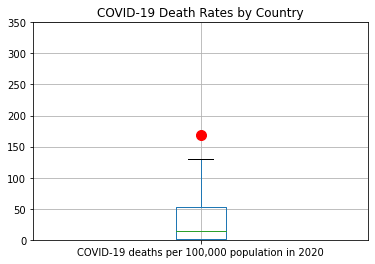

In [11]:
# Make box and whisker plot of COVID-19 death rates to visualize quartiles and outliers
# Format the appearance of outlier circles on the plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  markeredgecolor='red')

# Create the graph
df.boxplot(["COVID-19 deaths per 100,000 population in 2020"], flierprops=flierprops)
plt.title('COVID-19 Death Rates by Country')
plt.ylim(0, 350)

# Set file path for image
image_path = os.path.join("..", "Images", "coviddeaths_boxwhisker.png")

# Save chart as image
plt.savefig(image_path)

In [12]:
# Investigate whether removing outliers has an effect on correlation coefficients
# Make a copy of the main df
death_rate_df = df.copy()

# Drop outlier country Belgium
for value in death_rate_outliers:
    death_rate_df.drop(death_rate_df[death_rate_df['Country name'] == value].index, inplace = True)

# Create correlation matrix sans outlier
death_rate_df_corr = death_rate_df.corr()

# Purge irrelevant columns for easier viewing
death_rate_df_corr = death_rate_df_corr.iloc[[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14], [1, 10, 14]]

# Sort to investiate whether dropping outlier caused significant differences in correlation coefficients
death_rate_df_corr.sort_values('COVID-19 deaths per 100,000 population in 2020')

,2019 Life Ladder,"COVID-19 deaths per 100,000 population in 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
Index of institutional trust,0.072425,-0.403992,-0.397655
2019 Generosity,0.038817,-0.256605,-0.380434
Gini coefficient of income,-0.265821,-0.162114,0.130440
2019 Perceptions of corruption,-0.424686,0.108600,0.351189
2019 Freedom to make life choices,0.589720,0.123730,-0.173372
2019 Social support,0.728991,0.389477,-0.283788
2019 Life Ladder,1.000000,0.404343,-0.289253
2019 Log GDP per capita,0.750292,0.480537,-0.275501
2019 Healthy life expectancy at birth,0.760288,0.502852,-0.269811
Median age,0.656807,0.552063,-0.104571


### Exploring Different COVID-19 Death Metrics

In this section, the countries for which data is available for the two COVID-19 death metrics are investigated. Data on the COVID-19 deaths per 100k metric is available for nearly every country for which 2019 data is available generally - 141. Data on the excess deaths per 100k metric is available for a much smaller subset of countries - 61.

Averages of all variables for both of the country groups are taken to investigate potential differences between the two groups. It appears the smaller set of 61 countries is on average slightly happier, wealthier, and older than the larger set of 141 countries. It is hypothesized that these 61 countries may represent the more highly developed nations of the world. Further research reveals that the excess deaths metric, which is normally collected in person, could only be collected in those countries with reliable internet access in 2020 due to the pandemic. This would indicate that our hypothesis may be borne out. The excess deaths metric was thus eliminated for use in our analysis since any relationships discovered between excess deaths and happiness cannot be generalized.

As a point of inquiry unrelated to the main analysis, we investigated the relationship between age and GDP (wealth), attempting to explore whether median age in a country is related to GDP (it is often pointed out that developed countries tend to be older) and whether the group of 61 countries explored above tends to be more homogeneous in terms of median age. This inquiry was prompted by unexpected correlation coefficients in the main analysis for the COVID-19 deaths per 100k population metric, and the fact that median age appeared to be moderately significant in terms of its correlation with the COVID-19 death rate. We wondered whether potential effects of median age might mask the true effects of variables like GDP if the two are related, and perhaps if the group of 61 countries demonstrates more homogeneity in terms of age, this effect would be minimized. However, this inquiry is merely exploratory conjecture since no strong relationships are found to potentially explain COVID-19 deaths in the main analysis and the mathematical model for examining such survivial data is not available to us.

In [13]:
# Drop countries with no data for COVID-19 death rates from df to sort
drop_rate_na_df = df[df['COVID-19 deaths per 100,000 population in 2020'].notna()]

# Sort df by COVID-19 death rate to view highest and lowest countries
drop_rate_na_df.sort_values('COVID-19 deaths per 100,000 population in 2020')

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,2019 Negative affect,"COVID-19 deaths per 100,000 population in 2020",Median age,Index of institutional trust,Gini coefficient of income,"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
19,Cambodia,2019,4.998,8.387,0.759,62.000,0.957,0.013,0.828,0.844,0.390,0.000,25.6,0.498,36.000,NaN
67,Laos,2019,5.197,8.965,0.729,59.100,0.906,0.061,0.620,0.878,0.306,0.000,24.4,0.708,36.390,NaN
124,Taiwan Province of China,2019,6.537,NaN,0.893,NaN,0.814,NaN,0.718,0.860,0.093,0.029,42.2,0.158,29.467,-1.196
84,Mongolia,2019,5.563,9.418,0.946,62.500,0.711,0.149,0.873,0.707,0.167,0.031,28.6,0.102,32.350,-26.468
126,Tanzania,2019,3.640,7.886,0.687,58.000,0.850,0.100,0.589,0.726,0.243,0.035,17.7,0.621,37.780,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,North Macedonia,2019,5.015,9.711,0.815,65.474,0.725,0.024,0.923,0.576,0.304,120.141,39.1,0.105,32.400,235.030
57,Italy,2019,6.445,10.655,0.838,73.800,0.709,-0.082,0.866,0.631,0.328,122.654,47.9,0.076,33.400,182.298
14,Bosnia and Herzegovina,2019,6.016,9.609,0.873,68.100,0.722,0.079,0.963,0.633,0.238,123.445,42.5,0.064,33.030,NaN
116,Slovenia,2019,6.665,10.563,0.949,71.400,0.945,-0.102,0.785,0.679,0.228,129.730,44.5,0.177,23.400,182.711


In [14]:
# Collect countries for which COVID-19 death rate data exists (141)
death_rate_countries = drop_rate_na_df["Country name"]
death_count = death_rate_countries.count()
print(f"The number of countries for which COVID-19 deaths data exists is {death_count}. The below table shows the mean of all variables for this group of countries.")

# Collect countries for which COVID-19 excess deaths data exists (61)
drop_excess_na_df = df[df['Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'].notna()]
excess_deaths_countries = drop_excess_na_df["Country name"]
excess_count = excess_deaths_countries.count()

# Examine potential differences between these countries by calculating summary stats
rate_country_GDP_mean = drop_rate_na_df.mean()
excess_country_GDP_mean = drop_excess_na_df.mean()
print(rate_country_GDP_mean)

# Print info for excess deaths countries below the COVID-19 deaths countries
print(f"The number of countries for which excess deaths data exists is {excess_count}. The below table shows the mean of all variables for this group of countries.")
print(excess_country_GDP_mean)

# Explore whether the excess deaths countries may be more homogeneous in terms of age
rate_country_age_std = drop_rate_na_df.std()["Median age"]
excess_country_age_std = drop_excess_na_df.std()["Median age"]
print(f"The standard deviation of median age for the countries for which COVID-19 deaths per 100k data is available is: {rate_country_age_std}")
print(f"The standard deviation of median age for the countries for which excess deaths per 100k data is available is: {excess_country_age_std}")

The number of countries for which COVID-19 deaths data exists is 141. The below table shows the mean of all variables for this group of countries.
2019 year                                                                      2019.000000
2019 Life Ladder                                                                  5.580624
2019 Log GDP per capita                                                           9.478743
2019 Social support                                                               0.816128
2019 Healthy life expectancy at birth                                            65.121708
2019 Freedom to make life choices                                                 0.795279
2019 Generosity                                                                  -0.020881
2019 Perceptions of corruption                                                    0.723261
2019 Positive affect                                                              0.713729
2019 Negative affect              

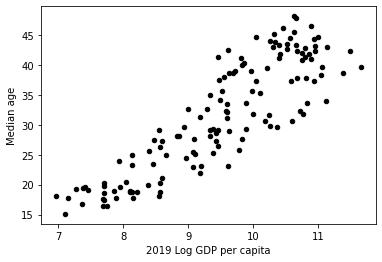

In [15]:
# Explore relationship between GDP (wealth) and age via scatter plot
df.plot(kind='scatter',x='2019 Log GDP per capita',y='Median age',color='black')

# Display the chart
plt.show()

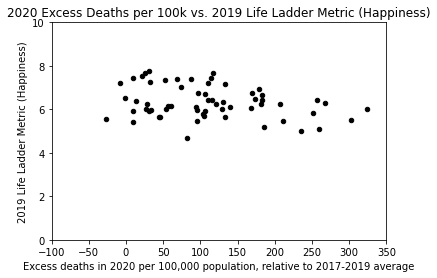

<Figure size 432x288 with 0 Axes>

In [16]:
# Create scatter plot comparing happiness to excess deaths
df.plot(kind='scatter',x='Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average',y='2019 Life Ladder',color='black')
plt.title('2020 Excess Deaths per 100k vs. 2019 Life Ladder Metric (Happiness)')
plt.ylabel("2019 Life Ladder Metric (Happiness)")
plt.xlim(-100, 350)
plt.ylim(0, 10)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("..", "Images", "excessdeaths_happy_scatter.png")

# Save chart as image
plt.savefig(image_path)